In [76]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

# Loading the dataset

In [3]:
#reading data 
loan = pd.read_csv('loan_data.csv')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#data columns  - 8
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
# exploring data - 500 entries with 5 numerical features
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# exploring data - investigate the numerical features' statistics
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

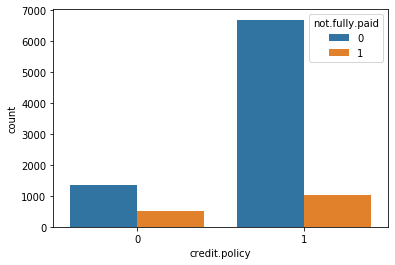

In [12]:
#how many of the borrower paid back their loan based on the lender credit policy
#It doesnt show any difference between the people who met the lender's criteria and the one who not  
sns.countplot(data=loan,x='credit.policy',hue='not.fully.paid')

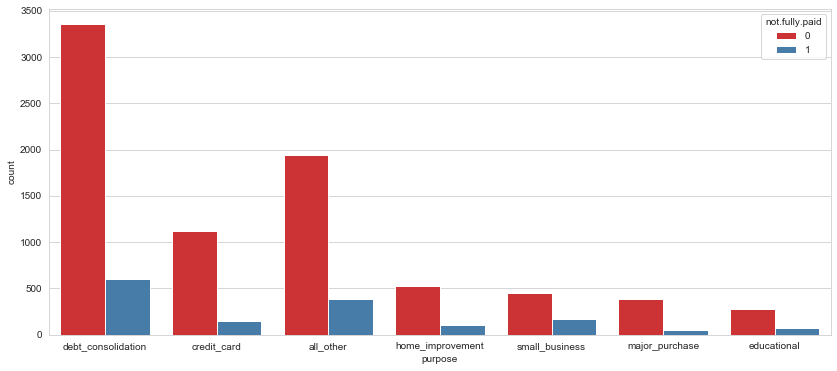

In [55]:
#how does the customers paid back their loan based on their reasons
plt.figure(figsize=(14,6))
sns.countplot(data=loan,x='purpose',hue='not.fully.paid',palette='Set1')

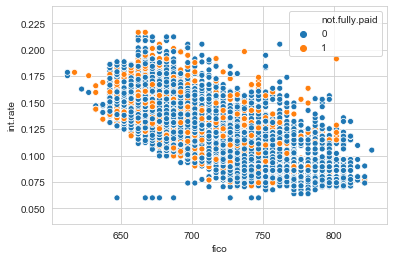

In [58]:
sns.scatterplot(data=loan,x='fico',y='int.rate',hue='not.fully.paid')

In [30]:
len(loan[(loan['pub.rec']==1) & (loan['credit.policy']==1)])

394

In [31]:
len(loan[(loan['pub.rec']==1) & (loan['credit.policy']==0)])

139

In [38]:
loan[(loan['pub.rec']==1) & (loan['credit.policy']==0)]['fico'].min()

642

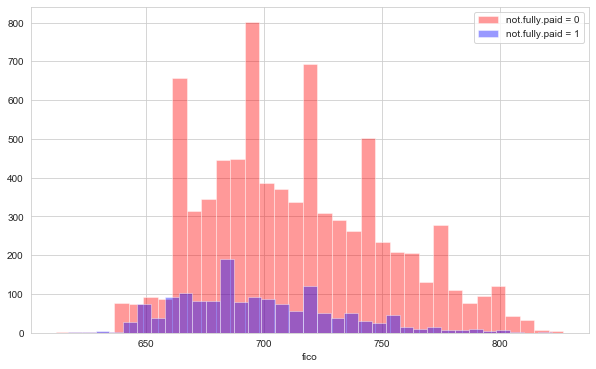

In [51]:
#fico score distribution based on borrower loan pay back
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(loan[loan['not.fully.paid']==0]['fico'],bins =35, color = 'red',kde=False)
sns.distplot(loan[loan['not.fully.paid']==1]['fico'],bins =35, color = 'blue',kde=False)
plt.legend(labels=['not.fully.paid = 0','not.fully.paid = 1'])
#The figure shows, the high credit score does not necessarily gurauntees the loan pay back 

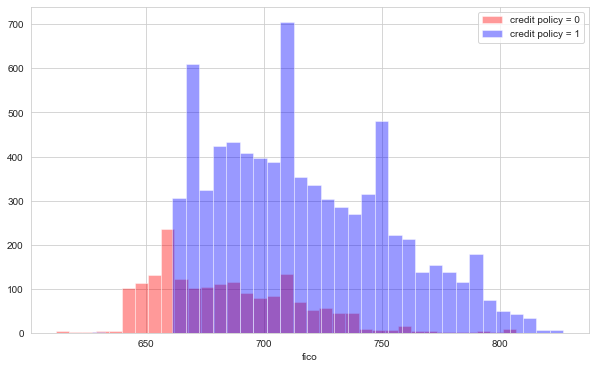

In [52]:
#fico score distribution based on lender credit policy. Whoeever has fico score more than 620 meets the lender's critera

plt.figure(figsize=(10,6))
sns.distplot(loan[loan['credit.policy']==0]['fico'],bins =35, color = 'red',kde=False)
sns.distplot(loan[loan['credit.policy']==1]['fico'],bins =35, color = 'blue',kde=False)
plt.legend(labels=['credit policy = 0','credit policy = 1'])

#Whoeever has fico score more than 620 meets the lender's critera

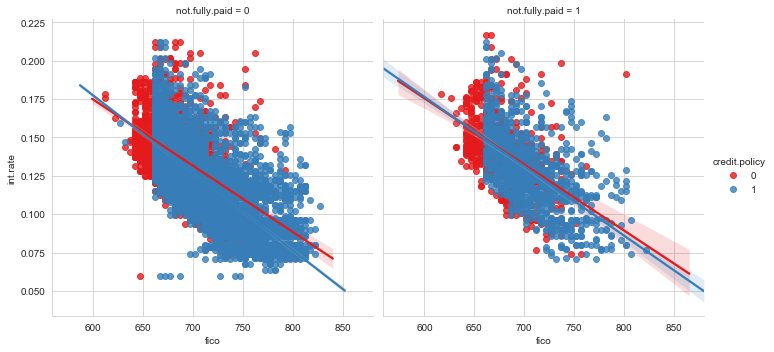

In [59]:
sns.lmplot(x='fico',y='int.rate',data=loan,hue='credit.policy',palette='Set1',col='not.fully.paid')

In [60]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


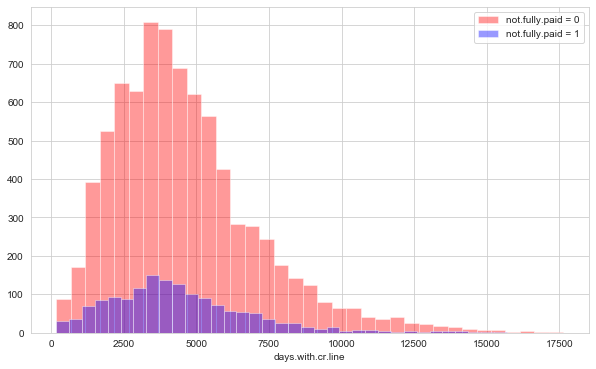

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(loan[loan['not.fully.paid']==0]['days.with.cr.line'],bins =35, color = 'red',kde=False)
sns.distplot(loan[loan['not.fully.paid']==1]['days.with.cr.line'],bins =35, color = 'blue',kde=False)
plt.legend(labels=['not.fully.paid = 0','not.fully.paid = 1'])



In [63]:
Loan_final = pd.get_dummies(loan,columns=['purpose'],drop_first=True)

In [64]:
Loan_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [70]:
#spliting data to train and test

X= Loan_final.drop('not.fully.paid',axis=1)
y= Loan_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# building and training the model - based on decision tree algorithm

In [71]:
ptree=DecisionTreeClassifier()
ptree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# prediction on the test data

In [72]:
pred = ptree.predict(X_test)

# model evaluation for decision tree algorithm

In [77]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1343  280]
 [ 222   71]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1623
           1       0.20      0.24      0.22       293

   micro avg       0.74      0.74      0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.74      0.75      1916



# building and training the model - based on random forest algorithm

In [78]:
pforest= RandomForestClassifier(n_estimators=300)
pforest.fit(X_train,y_train)
pred_f = pforest.predict(X_test)
print(confusion_matrix(y_test,pred_f))
print(classification_report(y_test,pred_f))

[[1617    6]
 [ 287    6]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.50      0.02      0.04       293

   micro avg       0.85      0.85      0.85      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.80      0.85      0.78      1916



In [82]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
pred_model = model.predict(X_test)
print(confusion_matrix(y_test,pred_model))
print(classification_report(y_test,pred_model))

[[1619    4]
 [ 292    1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.20      0.00      0.01       293

   micro avg       0.85      0.85      0.85      1916
   macro avg       0.52      0.50      0.46      1916
weighted avg       0.75      0.85      0.78      1916



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [89]:
from sklearn.svm import SVC

SVM_model= SVC(gamma='scale')
SVM_model.fit(X_train,y_train)
pred_svm = SVM_model.predict(X_test)
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

[[1623    0]
 [ 293    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       293

   micro avg       0.85      0.85      0.85      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.72      0.85      0.78      1916



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#the results are not good, especially for the class 1! why?
#because the data are imbalanced
#Let investigate it

In [86]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [102]:
loan_copy = Loan_final[Loan_final['not.fully.paid']==1]

In [103]:
len(loan_copy)

1533

In [114]:
Loan_balanced = Loan_final

In [111]:
len(Loan_balanced)

9578

In [115]:
Loan_balanced = Loan_balanced.append(loan_copy,ignore_index = True)
Loan_balanced = Loan_balanced.append(loan_copy,ignore_index = True)
Loan_balanced = Loan_balanced.append(loan_copy,ignore_index = True)
Loan_balanced = Loan_balanced.append(loan_copy,ignore_index = True)
len(Loan_balanced)

15710

# we have made new dataset with duplicate data from class 1. 

In [127]:
#spliting data to train and test

X= Loan_balanced.drop('not.fully.paid',axis=1)
y= Loan_balanced['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [128]:
#New decision tree model based on duplicate datset
ptree_balanced=DecisionTreeClassifier()
ptree_balanced.fit(X_train,y_train)
pred_balanced = ptree_balanced.predict(X_test)
print(confusion_matrix(y_test,pred_balanced))
print(classification_report(y_test,pred_balanced))

[[1284  278]
 [   0 1580]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1562
           1       0.85      1.00      0.92      1580

   micro avg       0.91      0.91      0.91      3142
   macro avg       0.93      0.91      0.91      3142
weighted avg       0.92      0.91      0.91      3142



In [129]:
#New random forest model based on duplicate datset

pforest_balanced= RandomForestClassifier(n_estimators=500)
pforest_balanced.fit(X_train,y_train)
pred_f_balanced = pforest.predict(X_test)
print(confusion_matrix(y_test,pred_f_balanced))
print(classification_report(y_test,pred_f_balanced))

[[1561    1]
 [ 293 1287]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1562
           1       1.00      0.81      0.90      1580

   micro avg       0.91      0.91      0.91      3142
   macro avg       0.92      0.91      0.91      3142
weighted avg       0.92      0.91      0.91      3142



# The classification with DT and RF for imbalanced data has accuracy 75 to 78 percent and one of the classes can not be classify properly.


# but when we using duplicate data from the smaller class, the accuracy go up to 92-3 percent and both classes can be classified properly.